In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
data = "../RawData/muon.data"
data = pd.read_csv(data, delimiter=',')

print(data)

         40000  1715382134
0        40000  1715382135
1        40000  1715382136
2        40000  1715382137
3        40000  1715382138
4        40000  1715382139
...        ...         ...
3001303  40000  1730315405
3001304  40000  1730315406
3001305  40000  1730315407
3001306  40000  1730315408
3001307  40000  1730315409

[3001308 rows x 2 columns]


In [3]:
df=pd.DataFrame(data)
df=df.rename(columns={'40000':'Tiempo','1715382134':'Fecha'})
df

,Tiempo,Fecha
0,40000,1715382135
1,40000,1715382136
2,40000,1715382137
3,40000,1715382138
4,40000,1715382139
...,...,...
3001303,40000,1730315405
3001304,40000,1730315406
3001305,40000,1730315407
3001306,40000,1730315408


In [4]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]*10**(-3)
df1

,Tiempo
954,2.74
970,1.24
987,3.06
1003,3.78
1006,15.70
...,...
3000988,3.50
3001065,5.42
3001143,2.96
3001165,2.62


In [5]:
filas=len(df1)
conteo_df = df1.groupby('Tiempo').size().reset_index(name='Cantidad')
#conteo_df['Cantidad']=conteo_df['Cantidad'].max()-conteo_df['Cantidad']
conteo_df['Error Tiempo']=0.01
conteo_df['Error decay']=0.1
conteo_df

,Tiempo,Cantidad,Error Tiempo,Error decay
0,0.04,6189,0.01,0.1
1,0.06,5894,0.01,0.1
2,0.08,628,0.01,0.1
3,0.10,963,0.01,0.1
4,0.12,844,0.01,0.1
...,...,...,...,...
993,19.90,99,0.01,0.1
994,19.92,157,0.01,0.1
995,19.94,54,0.01,0.1
996,19.96,40,0.01,0.1


In [6]:
Time,Cantidad=np.array(conteo_df['Tiempo']), np.array(conteo_df['Cantidad'])


In [7]:
Ter, Der=np.array(conteo_df['Error Tiempo']),np.array(conteo_df['Error decay'])


In [8]:
f_cum=np.cumsum(Cantidad)


In [9]:
decay=filas-f_cum
decay[-1]=1/10000000


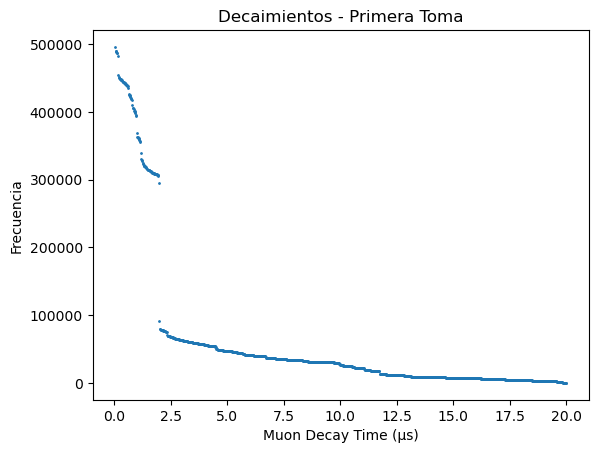

In [10]:
plt.scatter(Time, decay, s=1)

plt.title("Decaimientos - Primera Toma")
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')